In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
device_name = tf.test.gpu_device_name()
print(device_name)


Bad key "text.kerning_factor" on line 4 in
C:\Users\yumin\.conda\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#Read the total Canadian confirmed data, generating initial
initial=pd.read_csv('C:/Users/yumin/Desktop/RNN confirmed/canada_confirmed.csv')
pd.DataFrame(initial,columns=range(0,100))
print(type(initial))
initial.columns

<class 'pandas.core.frame.DataFrame'>


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '2001/1/21',
       '2001/2/21', '2001/3/21', '2001/4/21', '2001/5/21', '2001/6/21',
       ...
       '3/31/21', '2004/1/21', '2004/2/21', '2004/3/21', '2004/4/21',
       '2004/5/21', '2004/6/21', '2004/7/21', '2004/8/21', '2004/9/21'],
      dtype='object', length=103)

In [3]:
#Delete columns unrelated to this code, generating INITIAL_DROPCONLUMS
initial_dropconlums=initial.drop(['Province/State','Country/Region','Lat','Long'],axis=1)

In [4]:
#Change the INDEX in the INITIAL_DROPCONLUMS table to a number
initial_dropconlums.columns=range(0,initial_dropconlums.shape[1])
print(initial_dropconlums)

        0       1       2       3       4       5       6       7       8   \
0   100428  100428  104228  105535  106378  107501  108469  109652  110641   
1    51990   51990   51990   54201   54629   55254   56015   56632   56632   
2        0       0       0       0       0       0       0       0       0   
3       13      13      13      13      13      13      13      13      13   
4    24700   25026   25126   25244   25374   25541   25742   25963   26166   
5      601     611     618     635     662     693     717     735     765   
6      390     390     390     391     392     392     392     392     392   
7       24      24      24      24      24      24      24      24      24   
8     1486    1499    1499    1505    1508    1520    1524    1526    1529   
9      266     266     266     266     266     266     266     266     266   
10  187344  191035  195368  198929  202085  205283  208691  212962  216674   
11      94      94      94      96      97      97     102     1

In [5]:
#Change the cumulative confirmed data into new data every day and save it into a CSV file
import numpy as np
ay=np.zeros((initial_dropconlums.shape[1],initial_dropconlums.shape[0]))
for a in range(98):
    deffirence=initial_dropconlums[a+1]-initial_dropconlums[a]
    ay[a]=deffirence    
print(ay)  
ayT=ay.T
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", ayT, delimiter=",")

[[   0.    0.    0. ...    0.  495.    0.]
 [3800.    0.    0. ...    0.  238.    0.]
 [1307. 2211.    0. ...    0.  284.    5.]
 ...
 [1429. 1293.    0. ...    0.  205.    0.]
 [1521. 1262.    0. ...    0.  372.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [6]:
#The data of Canadian provinces are added and stored in JS files and CSV files
canadadata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
print(canadadata)
confirmed_data=pd.DataFrame(canadadata.sum(axis=0))
print(confirmed_data)
np.savetxt("C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv", confirmed_data, delimiter=",")
traindata=pd.read_csv('C:/Users/yumin/Desktop/ENEL 645/final/canada_deffirence.csv')
confirmed_data.to_json('./covid_canada_daily.js')

    0.000000000000000000e+00  3.800000000000000000e+03  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                      326.0                     100.0   
4                       10.0                       7.0   
5                        0.0                       0.0   
6                        0.0                       0.0   
7                       13.0                       0.0   
8                        0.0                       0.0   
9                     3691.0                    4333.0   
10                       0.0                       0.0   
11                       0.0                    7663.0   
12                       0.0                       0.0   
13                     495.0                     238.0   
14                       0.0                       0.0   

    1.307000000000000000e+03  8.430000000000000000e+02  \
0            

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
class data_preprocessing:
    def __init__(self,train_data,date):
        self.train_data = train_data
        self.date = date
    def train_test_split_data(train_data,date):
        dates=list(date.columns)
        dates1=dates[4:]
        dates=np.array(dates1)
        train_data=train_data.values
        nsplit1 = int(0.6*train_data.shape[0])
        nsplit2 = int(0.8*train_data.shape[0])
        X_train = train_data[:nsplit1]
        X_test = train_data[nsplit1:nsplit2]
        X_valid= train_data[nsplit2:]
        test_start_date=dates[-10]
        print(test_start_date)
        day=[]
        for i in range(0,55):
          day.append(i+1)
        day=np.array(day)
        print(day)
        return X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid
    def traindata_MinMaxScaler():
        X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)   
        scaler=MinMaxScaler(feature_range = (0,1))
        training_set_scaled = scaler.fit_transform(X_train)
        test_set_scaled = scaler.fit_transform(X_test)
        valid_set_scaled = scaler.fit_transform(X_valid)
        
        return training_set_scaled,test_set_scaled,scaler,valid_set_scaled
    def create_y_train(self):
#         X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
#         train_fit = np.expand_dims(X_train, axis = 1)
#         scaler = MinMaxScaler.fit(train_fit)
        
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
#         org_dataframe=training_set_scaled
#         training_set_scaled=scaler.fit_transform(org_dataframe.reshape(-1,1))
#         print(len(training_set_scaled))
        time_steps=10
        x_data=[]
        y_data=[]
        for i in range(time_steps,len(training_set_scaled)):
          x_data.append(training_set_scaled[i-time_steps:i,0])
          y_data.append(training_set_scaled[i,0])
        x_data=np.array(x_data)
        print("x_data_shape",x_data.shape)
        y_data=np.array(y_data)
        print("y_data_shape",y_data.shape)
        x_data=np.reshape(x_data,(x_data.shape[0],x_data.shape[1],1))
        y_data=np.reshape(y_data,(y_data.shape[0],1))
        print('Reshaped x_data shape' , x_data.shape)
        print('Reshaped y_data shape' , y_data.shape)
        print(x_data.shape[1])
        return x_data,y_data
    def create_y_test(self):
        time_steps=10
        x_test=[]
        y_test=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(test_set_scaled)):
          x_test.append(test_set_scaled[i-time_steps:i])
          y_test.append(training_set_scaled[i,0])

        x_test=np.array(x_test)
        y_test=np.array(y_test)
        y_test=np.reshape(y_test,(y_test.shape[0],1))
        return x_test,y_test
    def create_y_valid(self):
        time_steps=10
        x_valid=[]
        y_valid=[]
        training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
        for i in range(time_steps,len(valid_set_scaled)):
          x_valid.append(valid_set_scaled[i-time_steps:i])
          y_valid.append(valid_set_scaled[i,0])

        x_valid=np.array(x_valid)
        y_valid=np.array(y_valid)
        y_valid=np.reshape(y_valid,(y_valid.shape[0],1))
        return x_valid,y_valid



# X_train,X_test,dates,nsplit1,nsplit2,test_start_date= data_preprocessing.train_test_split_data(traindata,initial)
preprocessing=data_preprocessing(traindata,initial)
X_train,X_test,dates,nsplit1,nsplit2,test_start_date,X_valid= data_preprocessing.train_test_split_data(traindata,initial)
# training_set_scaled,test_set_scaled=preprocessing.traindata_MinMaxScaler()
training_set_scaled,test_set_scaled,scaler,valid_set_scaled=data_preprocessing.traindata_MinMaxScaler()
x_data,y_data=preprocessing.create_y_train()
x_test,y_test=preprocessing.create_y_test()
x_valid,y_valid=preprocessing.create_y_valid()
data_preprocessing.train_test_split_data(traindata,initial)
# print(test_set_scaled)

3/31/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
3/31/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
3/31/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
x_data_shape (48, 10)
y_data_shape (48,)
Reshaped x_data shape (48, 10, 1)
Reshaped y_data shape (48, 1)
10
3/31/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
3/31/21
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55]
3/31/21

(array([[12341.],
        [ 8751.],
        [ 6407.],
        [ 6959.],
        [ 7259.],
        [ 8054.],
        [ 7404.],
        [ 6472.],
        [ 7686.],
        [ 5489.],
        [ 6264.],
        [ 6480.],
        [ 6095.],
        [ 5642.],
        [ 5534.],
        [ 5946.],
        [ 4572.],
        [ 5032.],
        [ 5433.],
        [ 5184.],
        [ 4521.],
        [ 4216.],
        [ 4875.],
        [ 3675.],
        [ 3861.],
        [ 4345.],
        [ 4284.],
        [ 3727.],
        [ 3472.],
        [ 4147.],
        [ 2680.],
        [ 3008.],
        [ 3400.],
        [ 3740.],
        [ 2916.],
        [ 2856.],
        [ 3534.],
        [ 2488.],
        [ 2929.],
        [ 2826.],
        [ 2365.],
        [ 3492.],
        [ 1920.],
        [ 1512.],
        [ 3956.],
        [ 2284.],
        [ 3020.],
        [ 2758.],
        [ 2277.],
        [ 2079.],
        [ 3180.],
        [ 2946.],
        [ 2515.],
        [ 2748.],
        [ 2816.],
        [ 

In [8]:
print(x_data)

[[[1.        ]
  [0.66848278]
  [0.45202696]
  [0.5030012 ]
  [0.53070459]
  [0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]]

 [[0.66848278]
  [0.45202696]
  [0.5030012 ]
  [0.53070459]
  [0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]]

 [[0.45202696]
  [0.5030012 ]
  [0.53070459]
  [0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]
  [0.45876812]]

 [[0.5030012 ]
  [0.53070459]
  [0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]
  [0.45876812]
  [0.42321544]]

 [[0.53070459]
  [0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]
  [0.45876812]
  [0.42321544]
  [0.38138332]]

 [[0.60411857]
  [0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]
  [0.45876812]
  [0.42321544]
  [0.38138332]
  [0.3714101 ]]

 [[0.54409456]
  [0.45802937]
  [0.57013575]
  [0.36725459]
  [0.43882168]
  [0.45876812

In [9]:
print(y_valid)

[[0.49688553]
 [0.37363423]
 [0.61145716]
 [0.35862351]
 [0.55498826]
 [1.        ]
 [0.61646074]
 [0.69508833]
 [0.7720821 ]
 [0.        ]]


In [38]:
import tensorflow.keras as models
n_hidden_units=20
model = models.Sequential()
model.add(tf.keras.layers.GRU(units=50,return_sequences=True,recurrent_dropout=0.2,input_shape=(x_data.shape[1],1)))
# model.add(tf.keras.layers.Masking(mask_value=1, input_shape=(x_data.shape[1],1)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,#多层时需设置为true
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=n_hidden_units,activation='selu',kernel_initializer='orthogonal', recurrent_initializer='orthogonal',
              bias_initializer='zeros',
              bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None,
              bias_constraint=None, dropout=0.5, recurrent_dropout=0.0, implementation=1, return_sequences=True,
              return_state=False, go_backwards=False, stateful=False, unroll=False),merge_mode='concat'))   #input_shape=(max_lenth, max_features),

# model.add(tf.keras.layers.GRU(512, 
#                              return_sequences=True, 
#                             kernel_initializer='orthogonal', activation='selu'))
# model.add(tf.keras.layers.Dropout(0.5))
# embedding_dim, input_dim=embedding_dim, consume_less='mem', return_sequences=True
# model.add(Attention(keras.layers.wrappers))
# model.add(TimeDistributed(Dense(1, activation='sigmoid')))
model.add(tf.keras.layers.Dense(units=1))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.core.Activation('sigmoid'))
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=['mae'])
model.summary()
#  kernel_regularizer=regularizers.l2(0.01),

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 10, 50)            7950      
_________________________________________________________________
bidirectional_6 (Bidirection (None, 10, 40)            8640      
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10, 40)            7440      
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             41        
Total params: 24,071
Trainable params: 24,071
Non-trainable params: 0
_________________________________________________________________


In [48]:
print(x_data.shape)

(48, 10, 1)


Epoch 1/600
5/5 [==============================] - 1s 251ms/step - loss: 0.0259 - mae: 0.1222 - val_loss: 0.0401 - val_mae: 0.1825
Epoch 2/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0076 - mae: 0.0663 - val_loss: 0.0477 - val_mae: 0.2033
Epoch 3/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0073 - mae: 0.0675 - val_loss: 0.0212 - val_mae: 0.1196
Epoch 4/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0062 - mae: 0.0622 - val_loss: 0.0374 - val_mae: 0.1755
Epoch 5/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0060 - mae: 0.0587 - val_loss: 0.0255 - val_mae: 0.1355
Epoch 6/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0068 - mae: 0.0621 - val_loss: 0.0172 - val_mae: 0.1050
Epoch 7/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0059 - mae: 0.0602 - val_loss: 0.0381 - val_mae: 0.1762
Epoch 8/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0054 - mae: 0.0

5/5 [==============================] - 0s 17ms/step - loss: 0.0033 - mae: 0.0464 - val_loss: 0.0270 - val_mae: 0.1410
Epoch 64/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0031 - mae: 0.0461 - val_loss: 0.0318 - val_mae: 0.1586
Epoch 65/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0032 - mae: 0.0462 - val_loss: 0.0303 - val_mae: 0.1517
Epoch 66/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0030 - mae: 0.0434 - val_loss: 0.0317 - val_mae: 0.1608
Epoch 67/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0025 - mae: 0.0399 - val_loss: 0.0187 - val_mae: 0.1137
Epoch 68/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - mae: 0.0450 - val_loss: 0.0180 - val_mae: 0.1116
Epoch 69/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mae: 0.0387 - val_loss: 0.0319 - val_mae: 0.1598
Epoch 70/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0026 - mae: 0.0426 - 

5/5 [==============================] - 0s 38ms/step - loss: 0.0032 - mae: 0.0479 - val_loss: 0.0315 - val_mae: 0.1597
Epoch 126/600
5/5 [==============================] - 0s 31ms/step - loss: 0.0024 - mae: 0.0397 - val_loss: 0.0214 - val_mae: 0.1241
Epoch 127/600
5/5 [==============================] - 0s 26ms/step - loss: 0.0022 - mae: 0.0383 - val_loss: 0.0377 - val_mae: 0.1790
Epoch 128/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0033 - mae: 0.0459 - val_loss: 0.0264 - val_mae: 0.1408
Epoch 129/600
5/5 [==============================] - 0s 24ms/step - loss: 0.0023 - mae: 0.0390 - val_loss: 0.0219 - val_mae: 0.1259
Epoch 130/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0027 - mae: 0.0411 - val_loss: 0.0307 - val_mae: 0.1573
Epoch 131/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0030 - mae: 0.0431 - val_loss: 0.0364 - val_mae: 0.1759
Epoch 132/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0028 - mae: 0.

5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.0385 - val_loss: 0.0333 - val_mae: 0.1669
Epoch 188/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0029 - mae: 0.0434 - val_loss: 0.0234 - val_mae: 0.1302
Epoch 189/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0021 - mae: 0.0365 - val_loss: 0.0290 - val_mae: 0.1486
Epoch 190/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0029 - mae: 0.0444 - val_loss: 0.0176 - val_mae: 0.1100
Epoch 191/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - mae: 0.0448 - val_loss: 0.0252 - val_mae: 0.1347
Epoch 192/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mae: 0.0400 - val_loss: 0.0348 - val_mae: 0.1693
Epoch 193/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0026 - mae: 0.0418 - val_loss: 0.0269 - val_mae: 0.1425
Epoch 194/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.

5/5 [==============================] - 0s 18ms/step - loss: 0.0025 - mae: 0.0409 - val_loss: 0.0222 - val_mae: 0.1251
Epoch 250/600
5/5 [==============================] - 0s 42ms/step - loss: 0.0025 - mae: 0.0414 - val_loss: 0.0207 - val_mae: 0.1195
Epoch 251/600
5/5 [==============================] - 0s 23ms/step - loss: 0.0026 - mae: 0.0422 - val_loss: 0.0205 - val_mae: 0.1193
Epoch 252/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - mae: 0.0387 - val_loss: 0.0307 - val_mae: 0.1556
Epoch 253/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0024 - mae: 0.0397 - val_loss: 0.0236 - val_mae: 0.1301
Epoch 254/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0022 - mae: 0.0390 - val_loss: 0.0227 - val_mae: 0.1265
Epoch 255/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0028 - mae: 0.0442 - val_loss: 0.0250 - val_mae: 0.1367
Epoch 256/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.

5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mae: 0.0397 - val_loss: 0.0289 - val_mae: 0.1524
Epoch 312/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0027 - mae: 0.0432 - val_loss: 0.0230 - val_mae: 0.1290
Epoch 313/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0034 - mae: 0.0478 - val_loss: 0.0234 - val_mae: 0.1321
Epoch 314/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.0390 - val_loss: 0.0159 - val_mae: 0.1045
Epoch 315/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0026 - mae: 0.0407 - val_loss: 0.0186 - val_mae: 0.1138
Epoch 316/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0024 - mae: 0.0400 - val_loss: 0.0273 - val_mae: 0.1463
Epoch 317/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.0385 - val_loss: 0.0280 - val_mae: 0.1457
Epoch 318/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0027 - mae: 0.

5/5 [==============================] - 0s 17ms/step - loss: 0.0030 - mae: 0.0445 - val_loss: 0.0215 - val_mae: 0.1228
Epoch 374/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0022 - mae: 0.0373 - val_loss: 0.0251 - val_mae: 0.1366
Epoch 375/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0023 - mae: 0.0388 - val_loss: 0.0208 - val_mae: 0.1194
Epoch 376/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0022 - mae: 0.0376 - val_loss: 0.0241 - val_mae: 0.1344
Epoch 377/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0026 - mae: 0.0414 - val_loss: 0.0301 - val_mae: 0.1550
Epoch 378/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0027 - mae: 0.0428 - val_loss: 0.0359 - val_mae: 0.1737
Epoch 379/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.0382 - val_loss: 0.0188 - val_mae: 0.1139
Epoch 380/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0028 - mae: 0.

5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mae: 0.0389 - val_loss: 0.0207 - val_mae: 0.1225
Epoch 436/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.0380 - val_loss: 0.0238 - val_mae: 0.1340
Epoch 437/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0022 - mae: 0.0388 - val_loss: 0.0209 - val_mae: 0.1208
Epoch 438/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.0405 - val_loss: 0.0262 - val_mae: 0.1427
Epoch 439/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0026 - mae: 0.0413 - val_loss: 0.0197 - val_mae: 0.1163
Epoch 440/600
5/5 [==============================] - 0s 33ms/step - loss: 0.0027 - mae: 0.0435 - val_loss: 0.0238 - val_mae: 0.1328
Epoch 441/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0023 - mae: 0.0402 - val_loss: 0.0200 - val_mae: 0.1172
Epoch 442/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0026 - mae: 0.

5/5 [==============================] - 0s 19ms/step - loss: 0.0026 - mae: 0.0413 - val_loss: 0.0293 - val_mae: 0.1514
Epoch 498/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0021 - mae: 0.0382 - val_loss: 0.0229 - val_mae: 0.1305
Epoch 499/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.0411 - val_loss: 0.0159 - val_mae: 0.1006
Epoch 500/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0025 - mae: 0.0396 - val_loss: 0.0202 - val_mae: 0.1188
Epoch 501/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0023 - mae: 0.0396 - val_loss: 0.0281 - val_mae: 0.1495
Epoch 502/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0021 - mae: 0.0368 - val_loss: 0.0229 - val_mae: 0.1281
Epoch 503/600
5/5 [==============================] - 0s 17ms/step - loss: 0.0024 - mae: 0.0403 - val_loss: 0.0220 - val_mae: 0.1266
Epoch 504/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0021 - mae: 0.

5/5 [==============================] - 0s 20ms/step - loss: 0.0022 - mae: 0.0365 - val_loss: 0.0157 - val_mae: 0.0981
Epoch 560/600
5/5 [==============================] - 0s 21ms/step - loss: 0.0024 - mae: 0.0403 - val_loss: 0.0180 - val_mae: 0.1087
Epoch 561/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0023 - mae: 0.0368 - val_loss: 0.0231 - val_mae: 0.1310
Epoch 562/600
5/5 [==============================] - 0s 18ms/step - loss: 0.0021 - mae: 0.0369 - val_loss: 0.0238 - val_mae: 0.1317
Epoch 563/600
5/5 [==============================] - 0s 22ms/step - loss: 0.0024 - mae: 0.0386 - val_loss: 0.0325 - val_mae: 0.1625
Epoch 564/600
5/5 [==============================] - 0s 27ms/step - loss: 0.0025 - mae: 0.0403 - val_loss: 0.0208 - val_mae: 0.1224
Epoch 565/600
5/5 [==============================] - 0s 20ms/step - loss: 0.0021 - mae: 0.0348 - val_loss: 0.0234 - val_mae: 0.1298
Epoch 566/600
5/5 [==============================] - 0s 19ms/step - loss: 0.0021 - mae: 0.

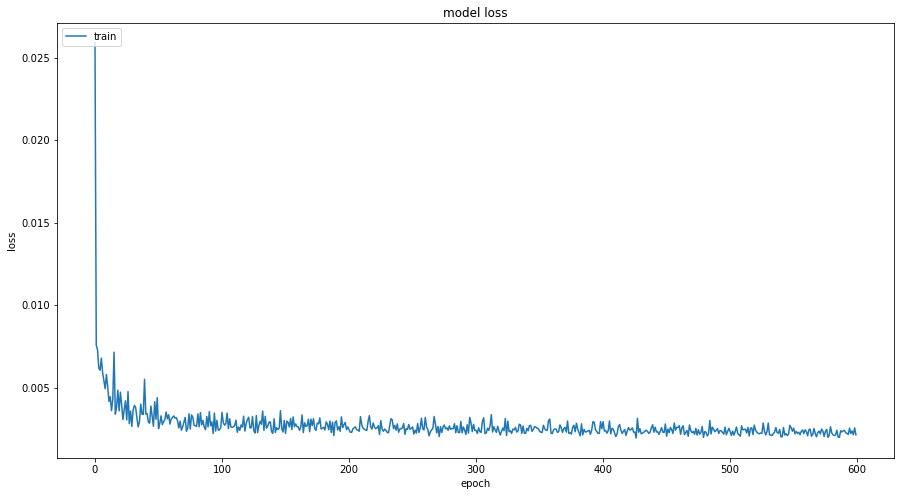

In [39]:

history_rnn=model.fit(x_data,y_data,epochs=600,validation_data =(x_test,y_test),batch_size=10)

history_rnn
loss_history = history_rnn.history["loss"]
# testing_loss_history = history_rnn.history["val_loss"]
plt.figure(figsize=(15, 8))
plt.title('model loss')
plt.plot(history_rnn.history['loss'], label='train')
# plt.plot(history_rnn.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss_model_mse.png')
plt.show()

In [40]:
score=model.evaluate(x_valid,y_valid)
print('score is: test_loss %f, mae %f' % (score[0],score[1]))

1/1 [==============================] - 0s 1ms/step - loss: 0.0892 - mae: 0.2464
score is: test_loss 0.089240, mae 0.246359


In [41]:

predicted_covid_19_spread=model.predict(x_valid)
# print(predicted_covid_19_spread)
predict_val=[]
# scaler = MinMaxScaler(feature_range = (0,1))
for i in range(0,predicted_covid_19_spread.shape[0]):
  print(predicted_covid_19_spread[i].mean())
  predict_val.append(predicted_covid_19_spread[i].mean())

predict_val=np.array(predict_val).reshape(-1,1)
predict=scaler.inverse_transform(predict_val)

print("The predicted perday spread from ",test_start_date,"is")
print(predict)



0.31743544
0.34410638
0.39812902
0.41491294
0.44110665
0.43646282
0.40798753
0.42902344
0.46659714
0.5015328
The predicted perday spread from  3/31/21 is
[[3108.6453]
 [3369.8337]
 [3898.8774]
 [4063.2424]
 [4319.7573]
 [4274.2803]
 [3995.4219]
 [4201.427 ]
 [4569.3857]
 [4911.5107]]


In [44]:

y_valid=np.array(y_valid).reshape(-1,1)
actual=scaler.inverse_transform(y_valid)
print(y_valid)


[[0.49688553]
 [0.37363423]
 [0.61145716]
 [0.35862351]
 [0.55498826]
 [1.        ]
 [0.61646074]
 [0.69508833]
 [0.7720821 ]
 [0.        ]]


MSE = 0.06887416223334403
R-Squared Score = -0.9339330360164333


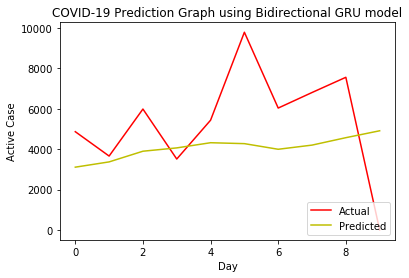

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from matplotlib.pyplot import *
# from sklearn.metrics import sqrt
time_steps=10
def evaluate_model(model,time_steps):
    
    # Prediction Time !!!!
#     predict_val =model.predict(x_valid)
    mse = mean_squared_error(y_valid[:-1],predict_val[:-1])
#     rmse = sqrt(mse)
    r = r2_score(y_valid[:-1],predict_val[:-1])
    return mse,r, y_valid, predict
mse,r2_score,true,predicted = evaluate_model(model,time_steps)
print('MSE = {}'.format(mse))
print('R-Squared Score = {}'.format(r2_score))



def plot_data(y_valid,predict):
    plt.plot(y_valid,c = 'r')
    plt.plot(predict,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Active Case')
    plt.title('COVID-19 Prediction Graph using Bidirectional GRU model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()
plot_data(actual,predict)